<a href="https://colab.research.google.com/github/aymuos/starship/blob/main/LaDe_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run once
!pip install black[jupyter] --quiet
from google.colab import drive

drive.mount("/content/drive")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
!black /content/drive/MyDrive/'Colab Notebooks'/'LaDe.ipynb'

All done! ✨ 🍰 ✨
1 file left unchanged.


In [ ]:
import pandas as pd

delivery = pd.read_pickle(
    "/content/drive/MyDrive/LaDe/data_with_trajectory_20s/delivery_five_cities.pkl.xz",
    compression="xz",
)

# print(delivery.head())

city_name = "上海市"

city_df = delivery[delivery["from_city_name"] == city_name].copy()
print(city_df.head())

                            order_id                     from_dipan_id  \
0   e4025a4e91d062078ff720f33d1a2499  39dbc318137dabd3a179db2568cdb3c0   
5   0ad21313ada79df2696fb4decde3ee2c  1d38fe6f1c02d1823402c53b846a54fb   
7   dd5bc0f4f2d76c1784e0d23db2799029  130a6ec7cf8e286e8e7b65565aeb5832   
9   8a131a51eaf0df0d9148e8555ddbc547  2462bee7bd5bf485b89c7babfbdab140   
12  a75f1bf44a62b0626b67e2c50c7878b2  3a182ab5bbb4ed02b2ce7ba36279b6bc   

   from_city_name                  delivery_user_id       poi_lng  \
0             上海市  a44530f407351f27387e3ddcd5e69bad  1.112229e+07   
5             上海市  ec227db3ed8730116bcb065b4b47d835  1.113493e+07   
7             上海市  a3a96546300042e8f012d9e20c849130  1.115222e+07   
9             上海市  76f3a64889a876684e4e5a4cf93d6dac  1.114627e+07   
12            上海市  023cd408449b4d1e3ad921470b46cae4  1.116263e+07   

         poi_lat                            aoi_id  \
0  -6.484431e+06  4ca5f674a8328cb39f06c96b654e7526   
5  -6.482164e+06  98440cc45f867e

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/LaDe/data_with_trajectory_20s/delivery_five_cities.pkl.xz', sep=',', encoding='utf-8')

ValueError: Item wrong length 4 instead of 320772.

In [ ]:
city_df['receipt_time']=pd.to_datetime(city_df['receipt_time'], format="%m-%d %H:%M:%S")
city_df['sign_time'] = pd.to_datetime(city_df['sign_time'], format="%m-%d %H:%M:%S")
city_df['actual_duration_min'] = (
    (city_df['sign_time'] - city_df['receipt_time']).dt.total_seconds() / 60
)
print(city_df.head())

                            order_id                     from_dipan_id  \
0   e4025a4e91d062078ff720f33d1a2499  39dbc318137dabd3a179db2568cdb3c0   
5   0ad21313ada79df2696fb4decde3ee2c  1d38fe6f1c02d1823402c53b846a54fb   
7   dd5bc0f4f2d76c1784e0d23db2799029  130a6ec7cf8e286e8e7b65565aeb5832   
9   8a131a51eaf0df0d9148e8555ddbc547  2462bee7bd5bf485b89c7babfbdab140   
12  a75f1bf44a62b0626b67e2c50c7878b2  3a182ab5bbb4ed02b2ce7ba36279b6bc   

   from_city_name                  delivery_user_id       poi_lng  \
0             上海市  a44530f407351f27387e3ddcd5e69bad  1.112229e+07   
5             上海市  ec227db3ed8730116bcb065b4b47d835  1.113493e+07   
7             上海市  a3a96546300042e8f012d9e20c849130  1.115222e+07   
9             上海市  76f3a64889a876684e4e5a4cf93d6dac  1.114627e+07   
12            上海市  023cd408449b4d1e3ad921470b46cae4  1.116263e+07   

         poi_lat                            aoi_id  \
0  -6.484431e+06  4ca5f674a8328cb39f06c96b654e7526   
5  -6.482164e+06  98440cc45f867e

In [ ]:
expected_hour = (
    city_df.groupby(['from_dipan_id', 'aoi_id'])
    .agg(
        expected_duration_min= ('actual_duration_min', 'median'),
        delivery_count=('order_id','count')
    )
    .reset_index()
    # .rename(columns={'actual_duration_min': 'expected_duration_min'})
)

# Merge back
city_df = city_df.merge(expected_hour, on=['from_dipan_id', 'aoi_id'], how='left')

print(city_df.head())

                           order_id                     from_dipan_id  \
0  e4025a4e91d062078ff720f33d1a2499  39dbc318137dabd3a179db2568cdb3c0   
1  0ad21313ada79df2696fb4decde3ee2c  1d38fe6f1c02d1823402c53b846a54fb   
2  dd5bc0f4f2d76c1784e0d23db2799029  130a6ec7cf8e286e8e7b65565aeb5832   
3  8a131a51eaf0df0d9148e8555ddbc547  2462bee7bd5bf485b89c7babfbdab140   
4  a75f1bf44a62b0626b67e2c50c7878b2  3a182ab5bbb4ed02b2ce7ba36279b6bc   

  from_city_name                  delivery_user_id       poi_lng  \
0            上海市  a44530f407351f27387e3ddcd5e69bad  1.112229e+07   
1            上海市  ec227db3ed8730116bcb065b4b47d835  1.113493e+07   
2            上海市  a3a96546300042e8f012d9e20c849130  1.115222e+07   
3            上海市  76f3a64889a876684e4e5a4cf93d6dac  1.114627e+07   
4            上海市  023cd408449b4d1e3ad921470b46cae4  1.116263e+07   

        poi_lat                            aoi_id  \
0 -6.484431e+06  4ca5f674a8328cb39f06c96b654e7526   
1 -6.482164e+06  98440cc45f867e4754b46583e1c27

In [ ]:
city_df['delay_min'] = (
    city_df['actual_duration_min'] - city_df['expected_duration_min']
).clip(lower=0)

delay_summary = (
    city_df.groupby(['from_dipan_id', 'aoi_id'])
    .agg(
        avg_delay_min=('delay_min', 'mean'),          # average delay
        median_delay_min=('delay_min', 'median'),     # median delay
        p90_delay_min=('delay_min', lambda x: x.quantile(0.9)),  # 90th percentile delay
        late_ratio=('delay_min', lambda x: (x > 0).mean()),      # % of orders delayed
        # task_count=('delay', 'count')             # number of orders in this group
    )
    .reset_index()
)

city_df = city_df.merge(
    delay_summary,
    on=['from_dipan_id', 'aoi_id'],
    how='left'
)
# print(city_df.head())
print(city_df.columns)

Index(['order_id', 'from_dipan_id', 'from_city_name', 'delivery_user_id',
       'poi_lng', 'poi_lat', 'aoi_id', 'typecode', 'receipt_time',
       'receipt_lng', 'receipt_lat', 'sign_time', 'sign_lng', 'sign_lat', 'ds',
       'actual_duration_min', 'expected_duration_min', 'delivery_count',
       'delay_min', 'avg_delay_min', 'median_delay_min', 'p90_delay_min',
       'late_ratio'],
      dtype='object')


In [ ]:
# Example: pick one random OD pair
sample_pair = city_df[['from_dipan_id','aoi_id']].drop_duplicates().sample(1, random_state=42)
dipan_id = sample_pair['from_dipan_id'].values[0]
aoi_id   = sample_pair['aoi_id'].values[0]

print("Selected pair:", dipan_id, aoi_id)

Selected pair: 2cf0d24cee3c0ad128ad76019f018f9a 74f84742f5e5ca5613ae161be252abd9


In [ ]:
ds_ids = city_df[
    (city_df['from_dipan_id'] == dipan_id) &
    (city_df['aoi_id'] == aoi_id)
]['ds'].unique()


file_name = 'courier_detailed_trajectory_20s.pkl.xz'
trajectory = pd.read_pickle(
    f"/content/drive/MyDrive/LaDe/data_with_trajectory_20s/{file_name}",
    compression="xz"
)

traj_subset = trajectory[trajectory['ds'].isin(ds_ids)]
print(trajectory.head())

    ds                        postman_id        gps_time           lat  \
0  321  106f5ac22cfd1574b196d16fed62f90d  03-21 07:31:58  3.953700e+06   
1  321  106f5ac22cfd1574b196d16fed62f90d  03-21 07:32:18  3.953700e+06   
2  321  106f5ac22cfd1574b196d16fed62f90d  03-21 07:32:41  3.953700e+06   
3  321  106f5ac22cfd1574b196d16fed62f90d  03-21 07:55:51  3.953700e+06   
4  321  106f5ac22cfd1574b196d16fed62f90d  03-21 08:31:42  3.953929e+06   

            lng  
0  3.053400e+06  
1  3.053398e+06  
2  3.053398e+06  
3  3.053398e+06  
4  3.052367e+06  


/tmp/ipython-input-3493221398.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_ds))  # 'tab20' gives 20 distinct colors


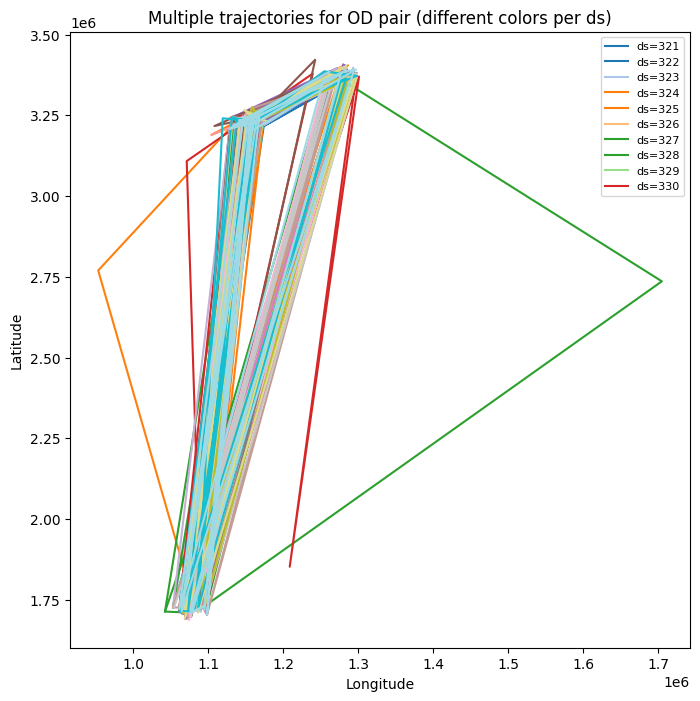

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# unique order IDs in the subset

unique_ds = traj_subset['ds'].unique()[:]
N=20

# colormap with as many colors as orders
colors = cm.get_cmap('tab20', len(unique_ds))  # 'tab20' gives 20 distinct colors

plt.figure(figsize=(8,8))

for i, (oid, group) in enumerate(traj_subset.groupby("ds")):
    group = group.sort_values("gps_time")
    group_sample = group.head(N)
    plt.plot(
        group_sample["lng"], group_sample["lat"],
        color=colors(i),
        linewidth=1.5,
        label=f"ds={oid}" if i < 10 else None  # only label first few to avoid clutter
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Multiple trajectories for OD pair (different colors per ds)")
plt.legend(loc="best", fontsize=8)
plt.show()


/tmp/ipython-input-1109272456.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_ds))  # 'tab20' gives 20 distinct colors


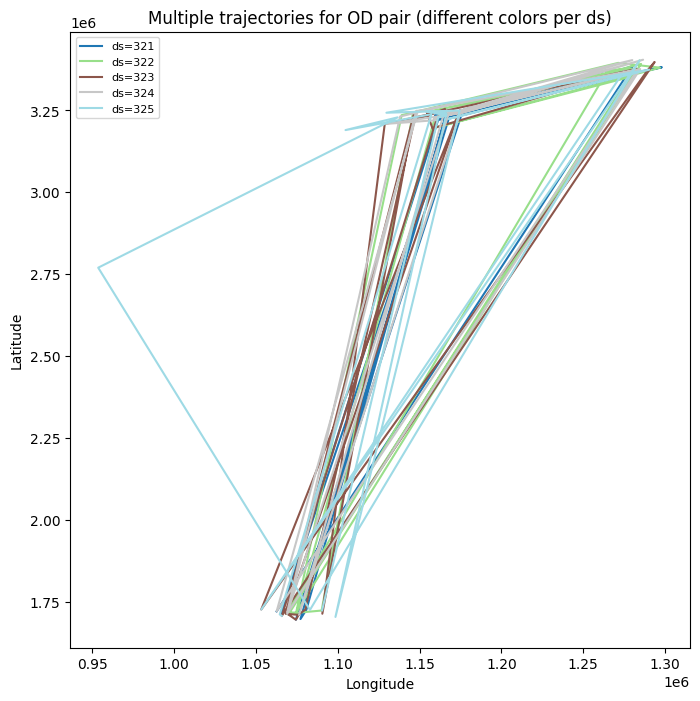

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# unique order IDs in the subset
max_orders=5
unique_ds = traj_subset['ds'].unique()[:max_orders]
traj_filtered = traj_subset[traj_subset['ds'].isin(unique_ds)]
N=20
# colormap with as many colors as orders
colors = cm.get_cmap('tab20', len(unique_ds))  # 'tab20' gives 20 distinct colors

plt.figure(figsize=(8,8))

for i, (oid, group) in enumerate(traj_filtered.groupby("ds")):
    group = group.sort_values("gps_time")
    group_sample = group.head(N)
    plt.plot(
        group_sample["lng"], group_sample["lat"],
        color=colors(i),
        linewidth=1.5,
        label=f"ds={oid}" if i < 10 else None  # only label first few to avoid clutter
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Multiple trajectories for OD pair (different colors per ds)")
plt.legend(loc="best", fontsize=8)
plt.show()


# Geocoding code


In [ ]:
# from shapely import wkt
# from pyproj import Geod

# # Example geometry string from roads.csv
# geom_str = "LINESTRING(120.123 30.456, 120.124 30.457, 120.125 30.460)"

# geom_str22 = "LINESTRING (13379359.0095489 3537767.4827929833, 13379319.390942128 3537766.1810310464)"

# # Parse WKT
# line = wkt.loads(geom_str)

# # Define geodesic calculator (WGS84 ellipsoid)
# geod = Geod(ellps="WGS84")

# # Calculate length in meters
# length_m = geod.geometry_length(line)
# print(f"Road length: {length_m:.2f} meters")